# Lasso Model

## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('1.04. Real-life example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
#data = raw_data

# Let's check the descriptives without 'Model'
#data.describe(include='all')

raw_data['Age']= 2016 - raw_data['Year']

In [5]:
raw_data = raw_data.drop(['Year'],axis=1)
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,Age
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,320,25
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,Sprinter 212,17
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,S 500,13
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,Q7,9
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,Rav 4,5


### Dealing with missing values

In [6]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Model             0
Age               0
dtype: int64

In [7]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = raw_data.dropna(axis=0)

In [8]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,Age
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,306,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,188,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,NaN,9.620373
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,0.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,NaN,4.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,NaN,9.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,NaN,13.000000


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

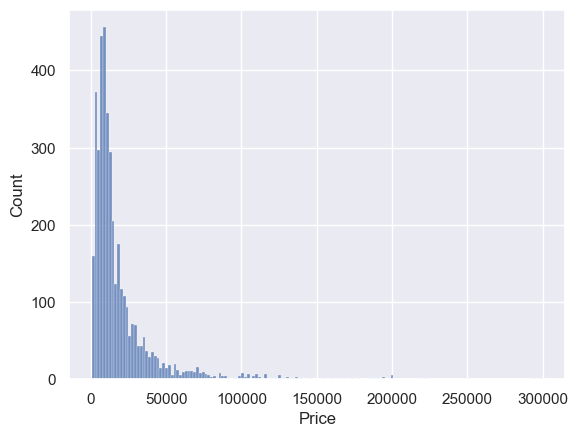

In [9]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.histplot(data_no_mv['Price'])

### Dealing with outliers

In [10]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,Age
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,302,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,188,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,NaN,9.707078
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,0.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,NaN,5.000000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,NaN,9.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,NaN,13.250000


<Axes: xlabel='Price', ylabel='Count'>

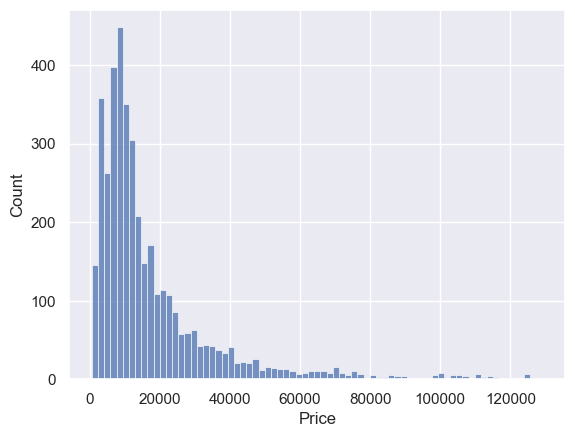

In [11]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.histplot(data_1['Price'])

<Axes: xlabel='Mileage', ylabel='Count'>

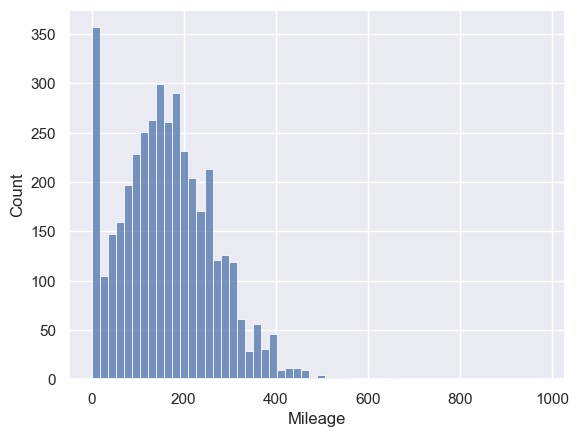

In [12]:
# We can treat the other numerical variables in a similar way
sns.histplot(data_no_mv['Mileage'])

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<Axes: xlabel='Mileage', ylabel='Count'>

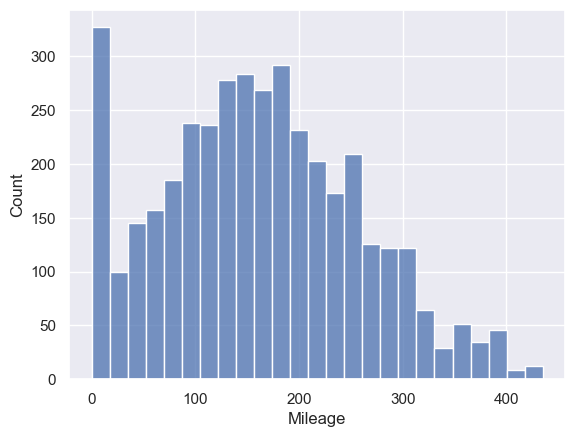

In [14]:
# This plot looks kind of normal, doesn't it?
sns.histplot(data_2['Mileage'])

<Axes: xlabel='EngineV', ylabel='Count'>

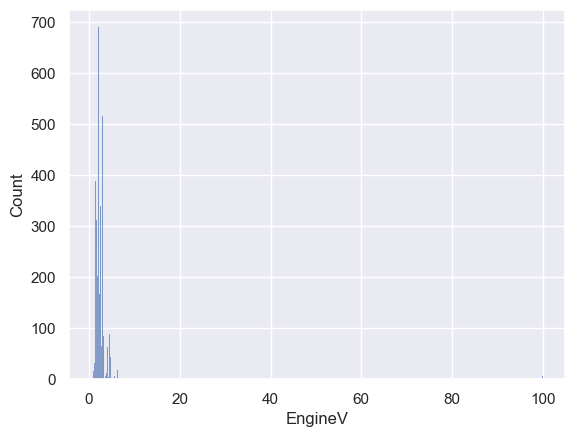

In [15]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.histplot(data_no_mv['EngineV'])

In [16]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

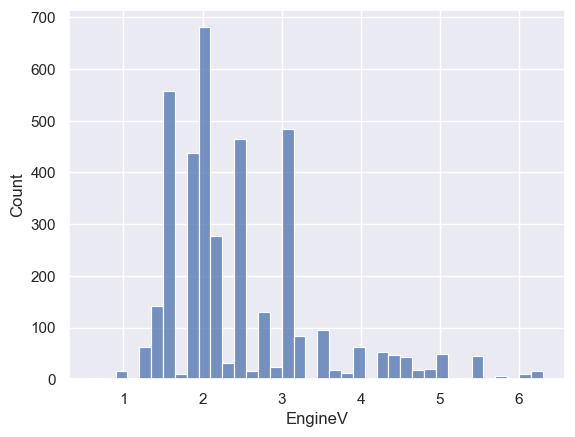

In [17]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.histplot(data_3['EngineV'])

<Axes: xlabel='Age', ylabel='Count'>

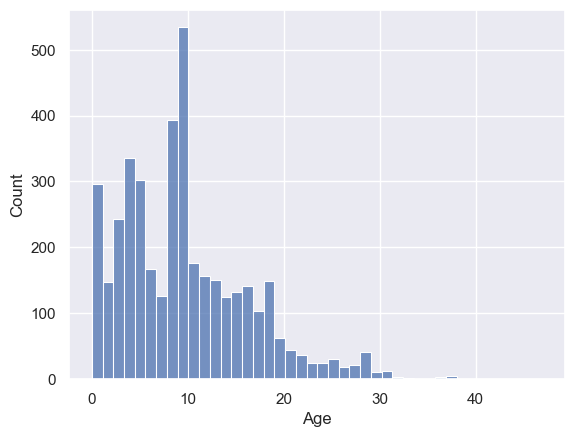

In [18]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.histplot(data_no_mv['Age'])

In [19]:
# I'll simply remove them
data_4 = data_3[data_3['Age']<30]

<Axes: xlabel='Age', ylabel='Count'>

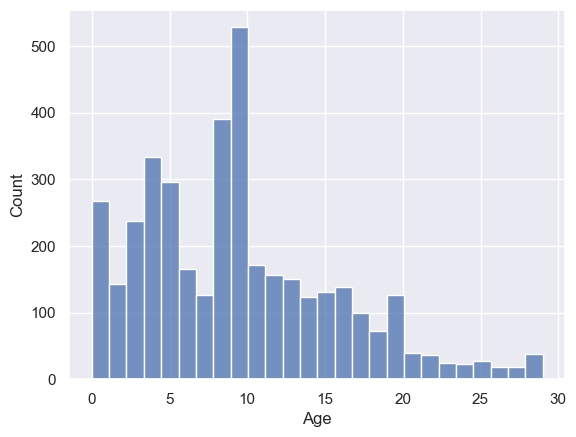

In [20]:
# Here's the new result
sns.histplot(data_4['Age'])

In [21]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [22]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,Age
count,3885,3885.000000,3885,3885.000000,3885.000000,3885,3885,3885,3885.000000
unique,7,NaN,6,NaN,NaN,4,2,293,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,853,NaN,1476,NaN,NaN,1808,3523,181,NaN
mean,NaN,18121.417429,NaN,161.022394,2.447606,NaN,NaN,NaN,9.381467
std,NaN,19071.730150,NaN,95.803259,0.948303,NaN,NaN,NaN,6.235109
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,0.000000
25%,NaN,7170.000000,NaN,92.000000,1.800000,NaN,NaN,NaN,4.000000
50%,NaN,11600.000000,NaN,158.000000,2.200000,NaN,NaN,NaN,8.000000
75%,NaN,21500.000000,NaN,227.000000,3.000000,NaN,NaN,NaN,13.000000


## Checking the OLS assumptions

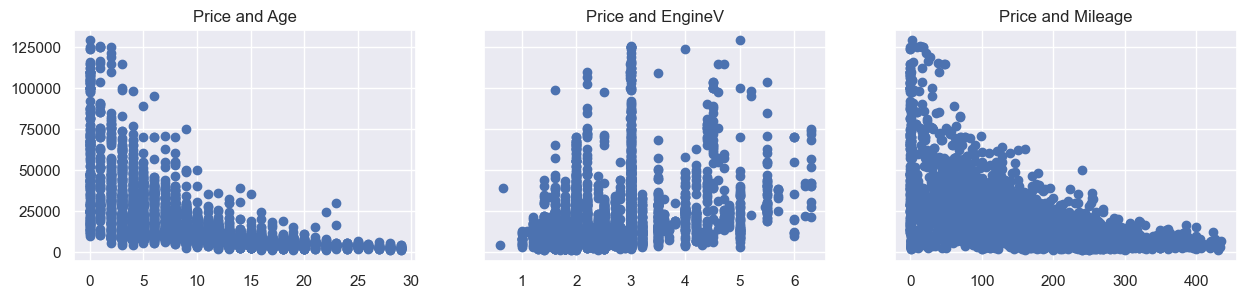

In [23]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Age'],data_cleaned['Price'])
ax1.set_title('Price and Age')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

<Axes: xlabel='Price', ylabel='Count'>

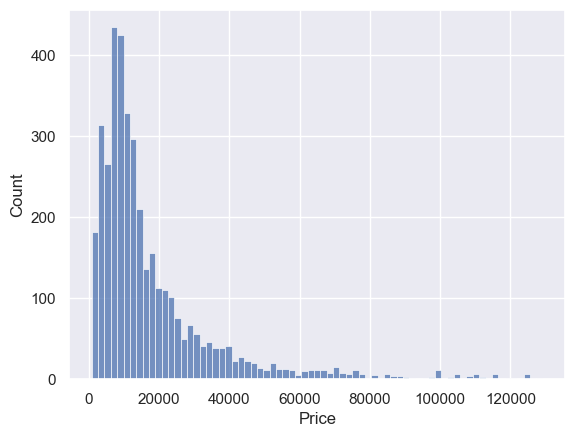

In [24]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.histplot(data_cleaned['Price'])

### Relaxing the assumptions

In [25]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,Age,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,320,25,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,Sprinter 212,17,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,S 500,13,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,Q7,9,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,Rav 4,5,9.814656
...,...,...,...,...,...,...,...,...,...,...
3880,Volkswagen,11500.0,van,163,2.5,Diesel,yes,T5 (Transporter),8,9.350102
3881,Toyota,17900.0,sedan,35,1.6,Petrol,yes,Corolla,2,9.792556
3882,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,S 350,2,11.736069
3883,BMW,6500.0,sedan,1,3.5,Petrol,yes,535,17,8.779557


<Axes: xlabel='log_price', ylabel='Count'>

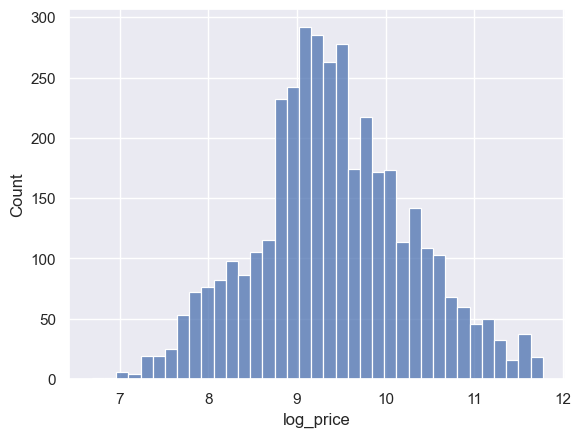

In [26]:
sns.histplot(data_cleaned['log_price'])

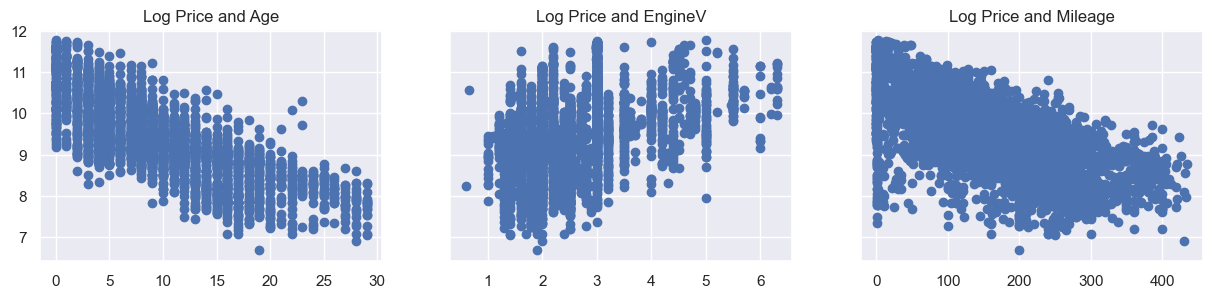

In [27]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Age'],data_cleaned['log_price'])
ax1.set_title('Log Price and Age')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [28]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [29]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model', 'Age', 'log_price'], dtype=object)

In [30]:
# Ridge already check for multicollinearity

## Create dummy variables

In [31]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [32]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,Age,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,25,8.342840,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,17,8.974618,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,13,9.495519,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,9,10.043249,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,5,9.814656,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
data_with_dummies

,Mileage,EngineV,Age,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,25,8.342840,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,17,8.974618,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,13,9.495519,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,9,10.043249,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,5,9.814656,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,163,2.5,8,9.350102,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3881,35,1.6,2,9.792556,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3882,9,3.0,2,11.736069,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3883,1,3.5,17,8.779557,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Rearrange a bit

In [34]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Age', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Mod

In [35]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price','Mileage', 'EngineV', 'Age', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes', 'Model_100', 'Model_11',
       'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_25',
       'Model_250', 'Model_300', 'Model_316', 'Model_318', 'Model_320',
       'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5', 'Model_5 Series', 'Model_5 Series GT', 'Model_520',
       'Model_523', 'Model_524', 'Model_525', 'Model_528', 'Model_530',
       'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Mark II', 'Model_Master', 'Model_Matrix',
       'Model_Megane', 'Model_Modus', 'Model_Multivan',
       'Model_New Beetle', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Pinin', 'Model_Pajero Sport',
       'Model_Pajero Wagon', 'Model_Passat B3', 'Model_Passat B4',
       'Model_Passat B5', 'Model_Passat B6', 'Model_Passat B7',
       'Model_Passat B8', 'Model_Passat CC', 'Model_Phaeton',
       'Model_Pointer', 'Model_Polo', 'Model_Previa', 'Model_Prius',
       'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320', 'Model_R8',
       'Model_Rav 4', 'Model_S 140', 'Model_S 250', 'Model_S 300',
       'Model_S 320', 'Model_S 350', 'Model_S 400', 'Model_S 430',
       'Model_S 500', 'Model_S 550', 'Model_S 600', 'Model_S 63 AMG',
       'Model_S 65 AMG', 'Model_S4', 'Model_S5', 'Model_S8',
       'Model_SL 500 (550)', 'Model_SL 55 AMG', 'Model_SLK 200',
       'Model_SLK 350', 'Model_Sandero', 'Model_Sandero StepWay',
       'Model_Scenic', 'Model_Scion', 'Model_Scirocco', 'Model_Sequoia',
       'Model_Sharan', 'Model_Sienna', 'Model_Smart', 'Model_Space Star',
       'Model_Space Wagon', 'Model_Sprinter 208', 'Model_Sprinter 210',
       'Model_Sprinter 211', 'Model_Sprinter 212', 'Model_Sprinter 213',
       'Model_Sprinter 311', 'Model_Sprinter 312', 'Model_Sprinter 313',
       'Model_Sprinter 315', 'Model_Sprinter 316', 'Model_Sprinter 318',
       'Model_Sprinter 319', 'Model_Symbol', 'Model_Syncro',
       'Model_T3 (Transporter)', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Tundra', 'Model_Up', 'Model_V 250', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3',
       'Model_Z4']

In [36]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Age,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,25,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.974618,427,2.9,17,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.495519,358,5.0,13,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.043249,240,4.2,9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.814656,120,2.0,5,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Linear regression model

### Declare the inputs and the targets

In [37]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [38]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [39]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [40]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [41]:
# Create a linear regression object
reg = Lasso(alpha=0.001)
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

Lasso(alpha=0.001)

In [42]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

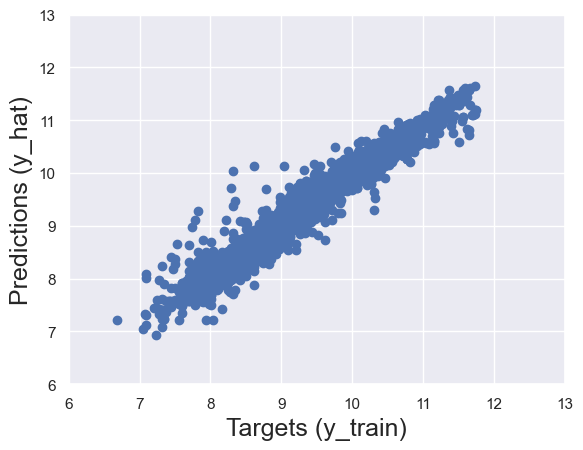

In [43]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

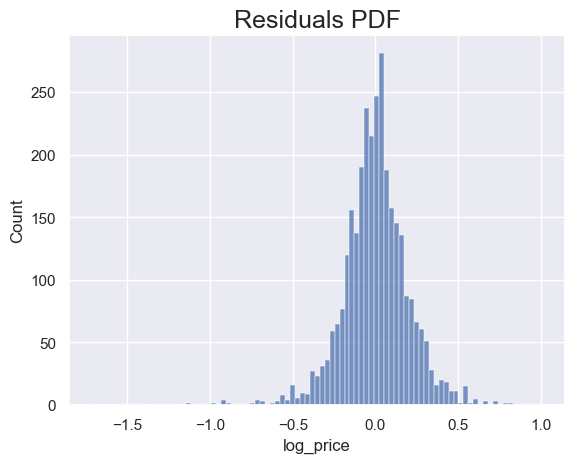

In [60]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.histplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [45]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9411050093080074

### Finding the weights and bias

In [46]:
# Obtain the bias (intercept) of the regression
reg.intercept_

np.float64(9.40650346816218)

In [47]:
# Create a regression summary where we can compare them with one-another
# This also can be use to check overfitting. To contrast weight can be sign of overfitting.
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.head()

,Features,Weights
0,Mileage,-0.067288
1,EngineV,0.090031
2,Age,-0.554496
3,Brand_BMW,0.033944
4,Brand_Mercedes-Benz,0.061146


## Testing

In [48]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

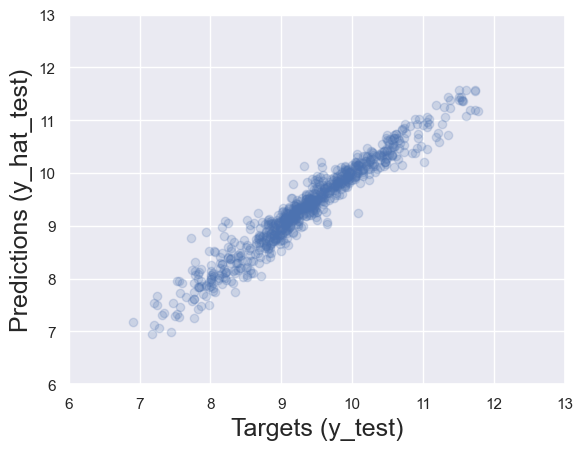

In [49]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [50]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8217.549187
1,9799.856504
2,22517.436178
3,2487.923919
4,7787.952894


In [51]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,8217.549187,NaN
1,9799.856504,7900.0
2,22517.436178,NaN
3,2487.923919,NaN
4,7787.952894,NaN
...,...,...
772,87528.682234,NaN
773,16803.027946,NaN
774,34831.609585,NaN
775,38627.066341,NaN


In [52]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    8.556414
1    9.350102
2    9.852194
3    8.039157
4    9.071078
Name: log_price, dtype: float64

In [53]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8217.549187,5200.0
1,9799.856504,11500.0
2,22517.436178,19000.0
3,2487.923919,3100.0
4,7787.952894,8700.0
...,...,...
772,87528.682234,103999.0
773,16803.027946,15700.0
774,34831.609585,63200.0
775,38627.066341,43500.0


In [54]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [55]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8217.549187,5200.0,-3017.549187,58.029792
1,9799.856504,11500.0,1700.143496,14.783856
2,22517.436178,19000.0,-3517.436178,18.512822
3,2487.923919,3100.0,612.076081,19.744390
4,7787.952894,8700.0,912.047106,10.483300
...,...,...,...,...
772,87528.682234,103999.0,16470.317766,15.836996
773,16803.027946,15700.0,-1103.027946,7.025656
774,34831.609585,63200.0,28368.390415,44.886694
775,38627.066341,43500.0,4872.933659,11.202146


In [56]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,777.000000,777.000000,777.000000,777.000000
mean,16689.817473,17499.943488,810.126014,16.219852
std,16112.407345,19080.134158,5950.747391,18.016491
min,1043.030399,999.000000,-13954.154042,0.006848
25%,6800.127970,6990.000000,-1189.638426,5.539245
50%,11648.256501,11500.000000,19.823977,11.589381
75%,20826.862511,20500.000000,1238.300678,20.430043
max,105927.538150,129222.000000,58181.030910,185.777392


In [57]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
200,20298.61,20300.00,1.39,0.01
510,9201.32,9200.00,-1.32,0.01
58,12503.96,12500.00,-3.96,0.03
172,2548.54,2550.00,1.46,0.06
63,20413.00,20400.00,-13.00,0.06
589,1551.56,1550.00,-1.56,0.10
761,20777.65,20800.00,22.35,0.11
478,14618.47,14600.00,-18.47,0.13
655,47078.64,47000.00,-78.64,0.17
419,14127.58,14100.00,-27.58,0.20


Text(0.5, 1.0, 'Residuals PDF')

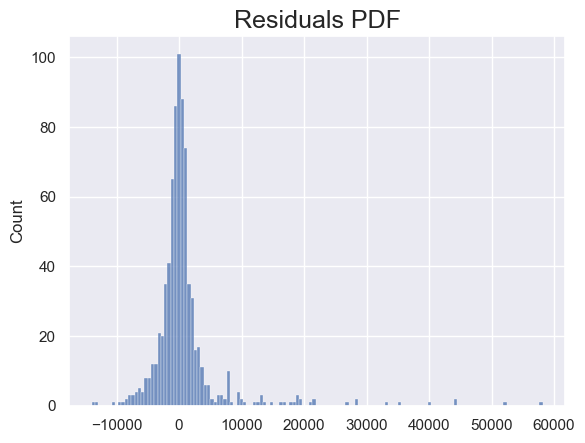

In [58]:
sns.histplot(df_pf['Target'] - df_pf['Prediction'])

# Include a title
plt.title("Residuals PDF", size=18)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error

# Pastikan Anda sudah memiliki y_test dan y_hat_test
# y_hat_test = reg.predict(x_test)

# 1. Menghitung R-squared
r2 = r2_score(y_test, y_hat_test)

# 2. Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_hat_test)

# 3. Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R-squared (R2): 0.9384
Mean Squared Error (MSE): 0.0483
Root Mean Squared Error (RMSE): 0.2198
